# Проект SQL. Анализ базы данных сервиса для чтения книг по подписке

## Описание проекта
Коронавирус застал мир врасплох, изменив привычный порядок вещей. В свободное время жители городов больше не выходят на улицу, не посещают кафе и торговые центры. Зато стало больше времени для книг. Это заметили стартаперы — и бросились создавать приложения для тех, кто любит читать. Ваша компания решила быть на волне и купила крупный сервис для чтения книг
по подписке. 

**Ваша первая задача как аналитика** — проанализировать базу данных. В ней — информация о книгах, издательствах, авторах, а также пользовательские обзоры книг. Эти данные помогут сформулировать ценностное предложение для нового продукта.

**Цель исследования**: Проанализировать базу данных сервиса для чтения книг по подписке - информацию о книгах, издательствах, авторах, а также пользовательские обзоры книг. Эти данные помогут сформулировать ценностное предложение для нового продукта.


### Описание данных

**1. Таблица `books`. Содержит данные о книгах:**

- `book_id` — идентификатор книги,
- `author_id` — идентификатор автора,
- `title` — название книги,
- `num_pages` — количество страниц,
- `publication_date` — дата публикации книги,
- `publisher_id` — идентификатор издателя.


**2. Таблица `authors`. Содержит данные об авторах:**

- `author_id` — идентификатор автора,
- `author` — имя автора.


**3. Таблица `publishers`. Содержит данные об издательствах:**

- `publisher_id` — идентификатор издательства,
- `publisher` — название издательства.

**4. Таблица `ratings`. Содержит данные о пользовательских оценках книг:**

- `rating_id` — идентификатор оценки,
- `book_id` — идентификатор книги,
- `username` — имя пользователя, оставившего оценку,
- `rating` — оценка книги.

**5. Таблица `reviews`. Содержит данные о пользовательских обзорах на книги:**

- `review_id` — идентификатор обзора,
- `book_id` — идентификатор книги,
- `username` — имя пользователя, написавшего обзор,
- `text` — текст обзора.

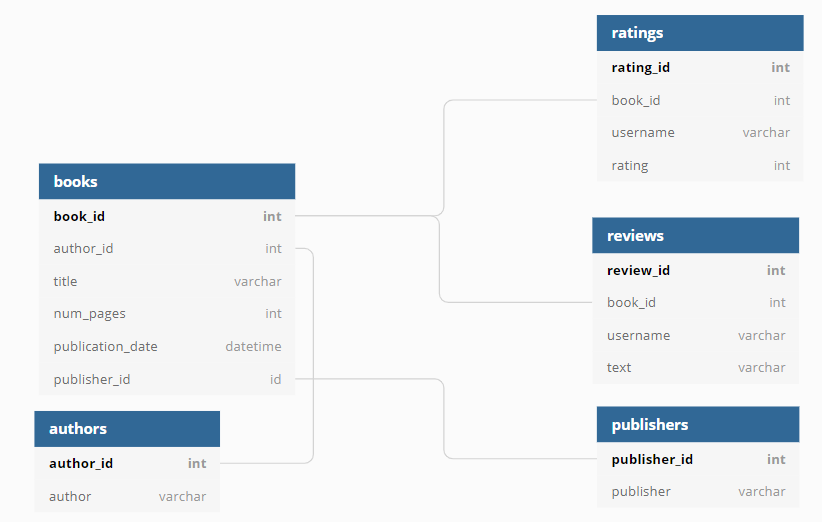 

### Задания
1. Посчитайте, сколько книг вышло после 1 января 2000 года;
2. Для каждой книги посчитайте количество обзоров и среднюю оценку;
3. Определите издательство, которое выпустило наибольшее число книг толще 50 страниц — так вы исключите из анализа брошюры;
4. Определите автора с самой высокой средней оценкой книг — учитывайте только книги с 50 и более оценками;
5. Посчитайте среднее количество обзоров от пользователей, которые поставили больше 50 оценок.

### Ход работы
1. Описание проекта и данных.
2. Подготовка данных: загрузка библиотек, подключение к базе данных.
3. Изучение общей информации о данных.
4. Выполнение заданий с помощью SQL запросов.
5. Общий вывод

## Подготовка данных

### Загрузка библиотек 

In [1]:
#проигнорируем предупреждения
import warnings
warnings.filterwarnings('ignore')

In [2]:
# импортируем библиотеки
import pandas as pd
from sqlalchemy import create_engine

In [3]:
# настроим вывод так чтобы:
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_colwidth', -1)                   # текст в ячейке отражался полностью вне зависимости от длины;
pd.set_option('display.float_format', '{:.2f}'.format)      # все числа отражались с двумя знаками после запятой.

### Подключение к базе данных

In [4]:
db_config = {'user': 'praktikum_student', # имя пользователя
             'pwd': 'Sdf4$2;d-d30pp', # пароль
             'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
             'port': 6432, # порт подключения
             'db': 'data-analyst-final-project-db' # название базы данных
            } 

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'], 
                                                         db_config['pwd'], 
                                                         db_config['host'], 
                                                         db_config['port'], 
                                                         db_config['db']
                                                        )

engine = create_engine(connection_string, connect_args={'sslmode':'require'})

## Изучение общей информации о данных.

### Исследование таблиц
Для каждой таблицы БД выведем первые 5 строк, посчитаем общее число записей и проверим записи на дубликаты

**Таблица `books` содержит данные о книгах.**

In [5]:
# Формируем sql-запрос. Выполняем запрос и сохраняем результат, выполнения в DataFrame.
query1 = ''' SELECT *
             FROM books
         '''
# Sqlalchemy автоматически установит названия колонок, такими же, как у таблицы в БД. 
books = pd.io.sql.read_sql(query1, con = engine)
books['publication_date'] = pd.to_datetime(books['publication_date'])
books.head(10) # получение первых 10 строк таблицы

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope #1),322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before Columbus,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268
5,6,257,1st to Die (Women's Murder Club #1),424,2005-05-20,116
6,7,258,2nd Chance (Women's Murder Club #2),400,2005-05-20,116
7,8,260,4th of July (Women's Murder Club #4),448,2006-06-01,318
8,9,563,A Beautiful Mind,461,2002-02-04,104
9,10,445,A Bend in the Road,341,2005-04-01,116


In [6]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   book_id           1000 non-null   int64         
 1   author_id         1000 non-null   int64         
 2   title             1000 non-null   object        
 3   num_pages         1000 non-null   int64         
 4   publication_date  1000 non-null   datetime64[ns]
 5   publisher_id      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 47.0+ KB


**Таблица `authors` содержит данные о авторах.**

In [7]:
# Формируем sql-запрос. Выполняем запрос и сохраняем результат, выполнения в DataFrame.
query2 = ''' SELECT *
             FROM authors
         '''
authors = pd.io.sql.read_sql(query2, con = engine)
authors.head(10) # получение первых 10 строк таблицы

,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd
5,6,Alan Paton
6,7,Albert Camus/Justin O'Brien
7,8,Aldous Huxley
8,9,Aldous Huxley/Christopher Hitchens
9,10,Aleksandr Solzhenitsyn/H.T. Willetts


In [8]:
authors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   author_id  636 non-null    int64 
 1   author     636 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.1+ KB


**Таблица `publishers` содержит данные о издательствах.**

In [9]:
# Формируем sql-запрос. Выполняем запрос и сохраняем результат, выполнения в DataFrame.
query3 = ''' SELECT *
             FROM publishers
         '''
# Sqlalchemy автоматически установит названия колонок, такими же, как у таблицы в БД. 
publishers = pd.io.sql.read_sql(query3, con = engine)
publishers.head(10) # получение первых 10 строк таблицы

,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company
5,6,Aladdin
6,7,Aladdin Paperbacks
7,8,Albin Michel
8,9,Alfred A. Knopf
9,10,Alfred A. Knopf Books for Young Readers


In [10]:
publishers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   publisher_id  340 non-null    int64 
 1   publisher     340 non-null    object
dtypes: int64(1), object(1)
memory usage: 5.4+ KB


**Таблица `ratings` содержит данные о пользовательских оценках книг.**

In [11]:
# Формируем sql-запрос. Выполняем запрос и сохраняем результат, выполнения в DataFrame.
query4 = ''' SELECT *
             FROM ratings
         '''
ratings = pd.io.sql.read_sql(query4, con = engine)
ratings.head(10) # получение первых 10 строк таблицы

,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2
5,6,3,johnsonamanda,4
6,7,3,scotttamara,5
7,8,3,lesliegibbs,5
8,9,4,abbottjames,5
9,10,4,valenciaanne,4


In [12]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6456 entries, 0 to 6455
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   rating_id  6456 non-null   int64 
 1   book_id    6456 non-null   int64 
 2   username   6456 non-null   object
 3   rating     6456 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 201.9+ KB


**Таблица `reviews` содержит данные о пользовательских обзорах.**

In [13]:
# Формируем sql-запрос. Выполняем запрос и сохраняем результат, выполнения в DataFrame.
query5 = ''' SELECT *
             FROM reviews
         '''
reviews = pd.io.sql.read_sql(query5, con = engine)
reviews.head(10) # получение первых 10 строк таблицы

,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. Over provide race technology continue these.
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Among admit investment argue security.
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but person sport treatment industry. Kitchen decision deep the. Social party body the.
3,4,3,johnsonamanda,Finally month interesting blue could nature cultural bit. Prepare beat finish grow that smile teach. Dream me play near.
4,5,3,scotttamara,Nation purpose heavy give wait song will. List dinner another whole positive radio fast. Music staff many green.
5,6,3,lesliegibbs,Analysis no several cause international.
6,7,4,valenciaanne,One there cost another. Say type save. With personal where occur direction foot. Half sit role want.
7,8,4,abbottjames,Within enough mother. There at system full recent play recognize.
8,9,5,npowers,Thank now focus realize economy focus fly. Item step fine war. Western service history anything.
9,10,5,staylor,Game push lot reduce where remember. Including song travel hair foot. Director always myself past story chance reason.


In [14]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2793 entries, 0 to 2792
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review_id  2793 non-null   int64 
 1   book_id    2793 non-null   int64 
 2   username   2793 non-null   object
 3   text       2793 non-null   object
dtypes: int64(2), object(2)
memory usage: 87.4+ KB


**Вывод:** Выполнили запрос по всем таблицам. Данные в порядке, пропусков нет. Теперь можно приступать к анализу данных. 

## Анализ данных с помощью SQL запросов

In [15]:
# Напишем функцию для выполнения запросов.
def display(query):
    return pd.io.sql.read_sql(query, con = engine)

### Посчитайте, сколько книг вышло после 1 января 2000 года

In [16]:
cnt_books = '''
SELECT 
    COUNT(*) AS cnt_books                        -- найдем общее количество строк в таблице books
FROM 
    books
WHERE 
    publication_date > '2000-01-01';
'''
display(cnt_books)

,cnt_books
0,819


**Вывод:** Всего **819 книг** вышло после 1 января 2000 г.

### Для каждой книги посчитайте количество обзоров и среднюю оценку

In [17]:
reviews_rating = '''                              
SELECT                                            -- выведем название книги, id книги, количество обзоров и средний рейтинг
    books.title AS title,
    books.book_id AS id,
    AVG(ratings.rating) AS avg_rating,            -- найдем среднюю оценку 
    COUNT(DISTINCT reviews.text) AS cnt_reviews   -- найдем количество уникальных строк в столбце reviews
FROM
    books
    LEFT JOIN ratings ON ratings.book_id = books.book_id
    LEFT JOIN reviews ON reviews.book_id = books.book_id
GROUP BY
    books.book_id
ORDER BY
    cnt_reviews DESC;                             -- сортируем данные по убыванию
'''
display(reviews_rating) 

,title,id,avg_rating,cnt_reviews
0,Twilight (Twilight #1),948,3.66,7
1,Water for Elephants,963,3.98,6
2,The Glass Castle,734,4.21,6
3,Harry Potter and the Prisoner of Azkaban (Harry Potter #3),302,4.41,6
4,The Curious Incident of the Dog in the Night-Time,695,4.08,6
...,...,...,...,...
995,Anne Rice's The Vampire Lestat: A Graphic Novel,83,3.67,0
996,The Natural Way to Draw,808,3.00,0
997,The Cat in the Hat and Other Dr. Seuss Favorites,672,5.00,0
998,Essential Tales and Poems,221,4.00,0


**Вывод:** 
Топ-5 книг по количеству обзоров:

1. Twilight (Twilight #1) 3.66 / 7
2. Water for Elephants 3.98 / 6
3. The Glass Castle 4.21 / 6
4. Harry Potter and the Prisoner of Azkaban (Harry Potter #3) 4.41 / 6
5. The Curious Incident of the Dog in the Night-Time 4.08 / 6

### Определите издательство, которое выпустило наибольшее число книг толще 50 страниц — так вы исключите из анализа брошюры

In [18]:
publisher_book = '''
SELECT                                                          -- выведем название издательства и количество книг
     publishers.publisher AS name_publisher,
     COUNT(books.book_id) AS cnt_books                          -- найдем количество книг 
FROM
    publishers
INNER JOIN books ON books.publisher_id = publishers.publisher_id
WHERE
    books.num_pages > 50                                        -- отфильтруем по количеству страниц в книге больше 50
GROUP BY
    name_publisher
ORDER BY                                                        -- отсортируем по количеству книг по убыванию
    cnt_books DESC
LIMIT 5                                                         -- напечатаем 5 строк таблицы
'''
display(publisher_book)

,name_publisher,cnt_books
0,Penguin Books,42
1,Vintage,31
2,Grand Central Publishing,25
3,Penguin Classics,24
4,Bantam,19


**Вывод:** Издательство, которое выпустило наибольшее число книг толще 50 страниц это Penguin books - 42 книги.

### Определите автора с самой высокой средней оценкой книг — учитывайте только книги с 50 и более оценками

In [19]:
best_author_avg_rating = '''
SELECT                                                     -- найдём количество и средний рейтинг по автору в подзапросе, 
     SUBQ.author AS author,                                -- а во внешнем запросе рассчитаем среднее полученных значений
     AVG(SUBQ.avg_rating) AS avg_rating
FROM
    (SELECT
         authors.author AS author,
         books.book_id AS id,
         AVG(ratings.rating) AS avg_rating,
         COUNT(ratings.rating) AS cnt_rating
    FROM
        authors
    INNER JOIN books ON books.author_id = authors.author_id
    INNER JOIN ratings ON ratings.book_id = books.book_id
    GROUP BY
        author,
        id
        HAVING
        COUNT(ratings.rating) >= 50) AS SUBQ
GROUP BY
    author
ORDER BY
    avg_rating DESC
LIMIT 5     
'''
display(best_author_avg_rating)

,author,avg_rating
0,J.K. Rowling/Mary GrandPré,4.28
1,Markus Zusak/Cao Xuân Việt Khương,4.26
2,J.R.R. Tolkien,4.26
3,Louisa May Alcott,4.19
4,Rick Riordan,4.08


**Вывод:** 

**J.K. Rowling/Mary GrandPré** - автор с самой высокой средней оценкой книг, у которых 50 и более оценок.

### Посчитайте среднее количество обзоров от пользователей, которые поставили больше 50 оценок

In [20]:
avg_reviews = '''              -- выведем среднее по количеству обзоров, округление выполним функцией round
SELECT 
    round(avg(count)) AS rounded_avg_review    
FROM
    (SELECT
        COUNT(text)
    FROM 
        reviews
    FULL OUTER JOIN (SELECT username, COUNT(rating_id) as cnt FROM ratings GROUP BY username) AS cnt_rating
    ON cnt_rating.username = reviews.username where cnt > 50
    GROUP BY reviews.username) as count;                                  
'''
display(avg_reviews)

,rounded_avg_review
0,24.00


**Вывод:** Среднее количество обзоров от пользователей, которые поставили больше 50 оценок - **24 обзора**.

## Общие выводы

Выполнено изучение таблиц БД, дубликатов записей не обнаружено.

В результате анализа выявлено:
1. После 1 января 2000 года было выпущено 819 книг. 
2. Топ-5 книн по количеству обзоров (средняя оценка/кол-во обзоров):
   - Twilight (Twilight #1) 3.66 / 7
   - Water for Elephants 3.98 / 6
   - The Glass Castle 4.21 / 6
   - Harry Potter and the Prisoner of Azkaban (Harry Potter #3) 4.41 / 6
   - The Curious Incident of the Dog in the Night-Time 4.08 / 6
   
3. Издательство Penguin Books - выпустило наибольше число книг толще 50 страниц - 42 книги.
4. J.K. Rowling/Mary GrandPré - автор с максимальным средним рейтингом книг.
5. Среднее число обзоров от пользователей, которые поставили больше 50 оценок - 24 обзора.